In [312]:
#export 
source("exp/nb_03a.R")

In [313]:
dfs = readRDS(paste(data_path,"dfs_filtered.rds"))

In [314]:
names(dfs)

[1] "METABRIC" "GSE11121" "GSE96058" "GSE7390"  "GSE9893"  "NKI"      "TCGA"    
[8] "GSE4922"

In [315]:
dfs_npi = vector("list", length = length(dfs))
names(dfs_npi) = names(dfs)

## Helper functions

In [316]:
init_df = function(t, e, npi){
    assert(length(t)==length(e),
           length(e)==length(npi))
    tmp = data.frame(matrix(ncol = 3, nrow = length(t)))
    tmp[,1] = t
    tmp[,2] = e
    tmp[,3] = npi
    colnames(tmp) = c("survival_time", "event", "npi")
    tmp
}

In [317]:
ν = function(f){
    assert(is.factor(f))
    as.numeric(levels(f))[f] 
}

In [318]:
tonode = function(x){
    x = as.numeric(x)
    x[1<=x & x<=3] = 2
    x[x==0] = 1
    x[x>3] = 3
    x
}

In [319]:
calc_npi = function(s, n, g){
    if(is.factor(n)){n=ν(n)}
    if(is.factor(g)){g=ν(g)}
    #impute 
    if(any(is.na(s))){s[is.na(s)]=median(s, na.rm = T)}
    if(any(is.na(n))){n[is.na(n)]=1}  #hist check
    if(any(is.na(g))){g[is.na(g)]=2} #hist check  
    
    assert(0 <= s, s <= 100)
    assert(0 <= n, n <= 3)
    assert(1 <= g, g <= 3)
    
    0.2*s + n + g
} 

In [56]:
η = function(df) ggplot(df,aes(x=npi)) + 
        geom_histogram(bins=40,  fill="lightblue", color="#9999ff") + 
        theme_classic() + 
        ggtitle("NPI")

## METABRIC

In [5]:
df = dfs[[1]]
dim(df)

[1]   683 19274

In [12]:
dfs_npi[[1]] = init_df(t = df$survival_time, e = df$event, npi = df$Nottingham.prognostic.index)

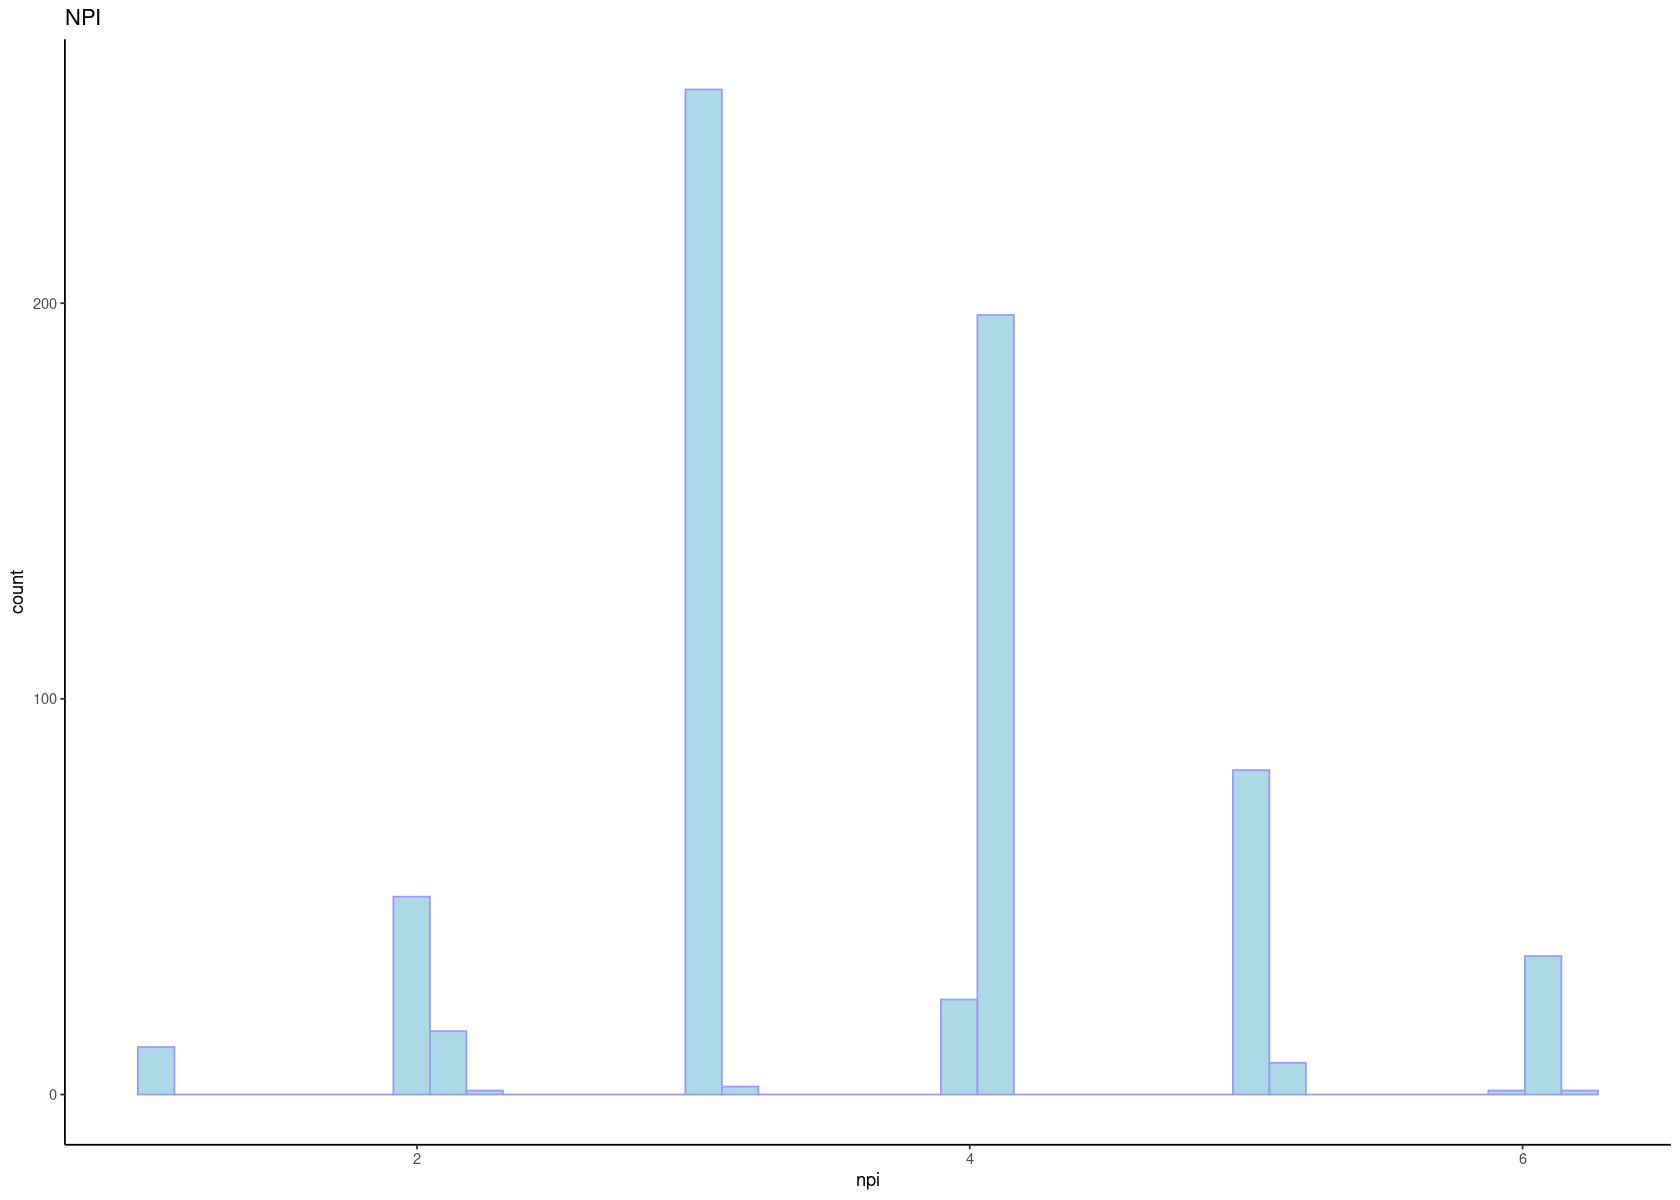

In [58]:
η(dfs_npi[[1]])

## GSE11121

In [44]:
n = 2
df = dfs[[n]]
dim(df)
names(df)[1:100]

[1]   120 12463

[1] "node_status"             "grade"                  
  [3] "tumor_size"              "survival_time"          
  [5] "event"                   "age"                    
  [7] "chemo"                   "hormonal"               
  [9] "ER"                      "Row.names"              
 [11] "title"                   "geo_accession"          
 [13] "status"                  "submission_date"        
 [15] "last_update_date"        "type"                   
 [17] "channel_count"           "source_name_ch1"        
 [19] "organism_ch1"            "characteristics_ch1"    
 [21] "characteristics_ch1.1"   "characteristics_ch1.2"  
 [23] "characteristics_ch1.3"   "characteristics_ch1.4"  
 [25] "characteristics_ch1.5"   "characteristics_ch1.6"  
 [27] "treatment_protocol_ch1"  "molecule_ch1"           
 [29] "extract_protocol_ch1"    "label_ch1"              
 [31] "label_protocol_ch1"      "taxid_ch1"              
 [33] "hyb_protocol"            "scan_protocol"          
 [35] "description"             "data_processing"        
 [37] "platform_id"             "contact_name"           
 [39] "contact_email"           "contact_phone"          
 [41] "contact_fax"             "contact_department"     
 [43] "contact_institute"       "contact_address"        
 [45] "contact_city"            "contact_zip/postal_code"
 [47] "contact_country"         "supplementary_file"     
 [49] "data_row_count"          "relation"               
 [51] "relation.1"              "relation.2"             
 [53] "clinic:ch1"              "e.dmfs:ch1"             
 [55] "grade:ch1"               "node:ch1"               
 [57] "size_in_cm:ch1"          "storage:ch1"            
 [59] "t.dmfs:ch1"              "study_id"               
 [61] "A1CF"                    "A2M"                    
 [63] "A4GALT"                  "A4GNT"                  
 [65] "AAAS"                    "AACS"                   
 [67] "AADAC"                   "AAGAB"                  
 [69] "AAK1"                    "AAMDC"                  
 [71] "AAMP"                    "AANAT"                  
 [73] "AAR2"                    "AARS1"                  
 [75] "AASDHPPT"                "AASS"                   
 [77] "AATF"                    "AATK"                   
 [79] "ABAT"                    "ABCA1"                  
 [81] "ABCA11P"                 "ABCA12"                 
 [83] "ABCA2"                   "ABCA3"                  
 [85] "ABCA4"                   "ABCA5"                  
 [87] "ABCA6"                   "ABCA7"                  
 [89] "ABCA8"                   "ABCB1"                  
 [91] "ABCB11"                  "ABCB4"                  
 [93] "ABCB6"                   "ABCB7"                  
 [95] "ABCB8"                   "ABCB9"                  
 [97] "ABCC1"                   "ABCC10"                 
 [99] "ABCC2"                   "ABCC3"

In [45]:
df$npi = calc_npi(s = df$tumor_size, n = df$node_status, g = df$grade)

In [46]:
dfs_npi[[n]] = init_df(t = df$survival_time, e = df$event, npi = df$npi)

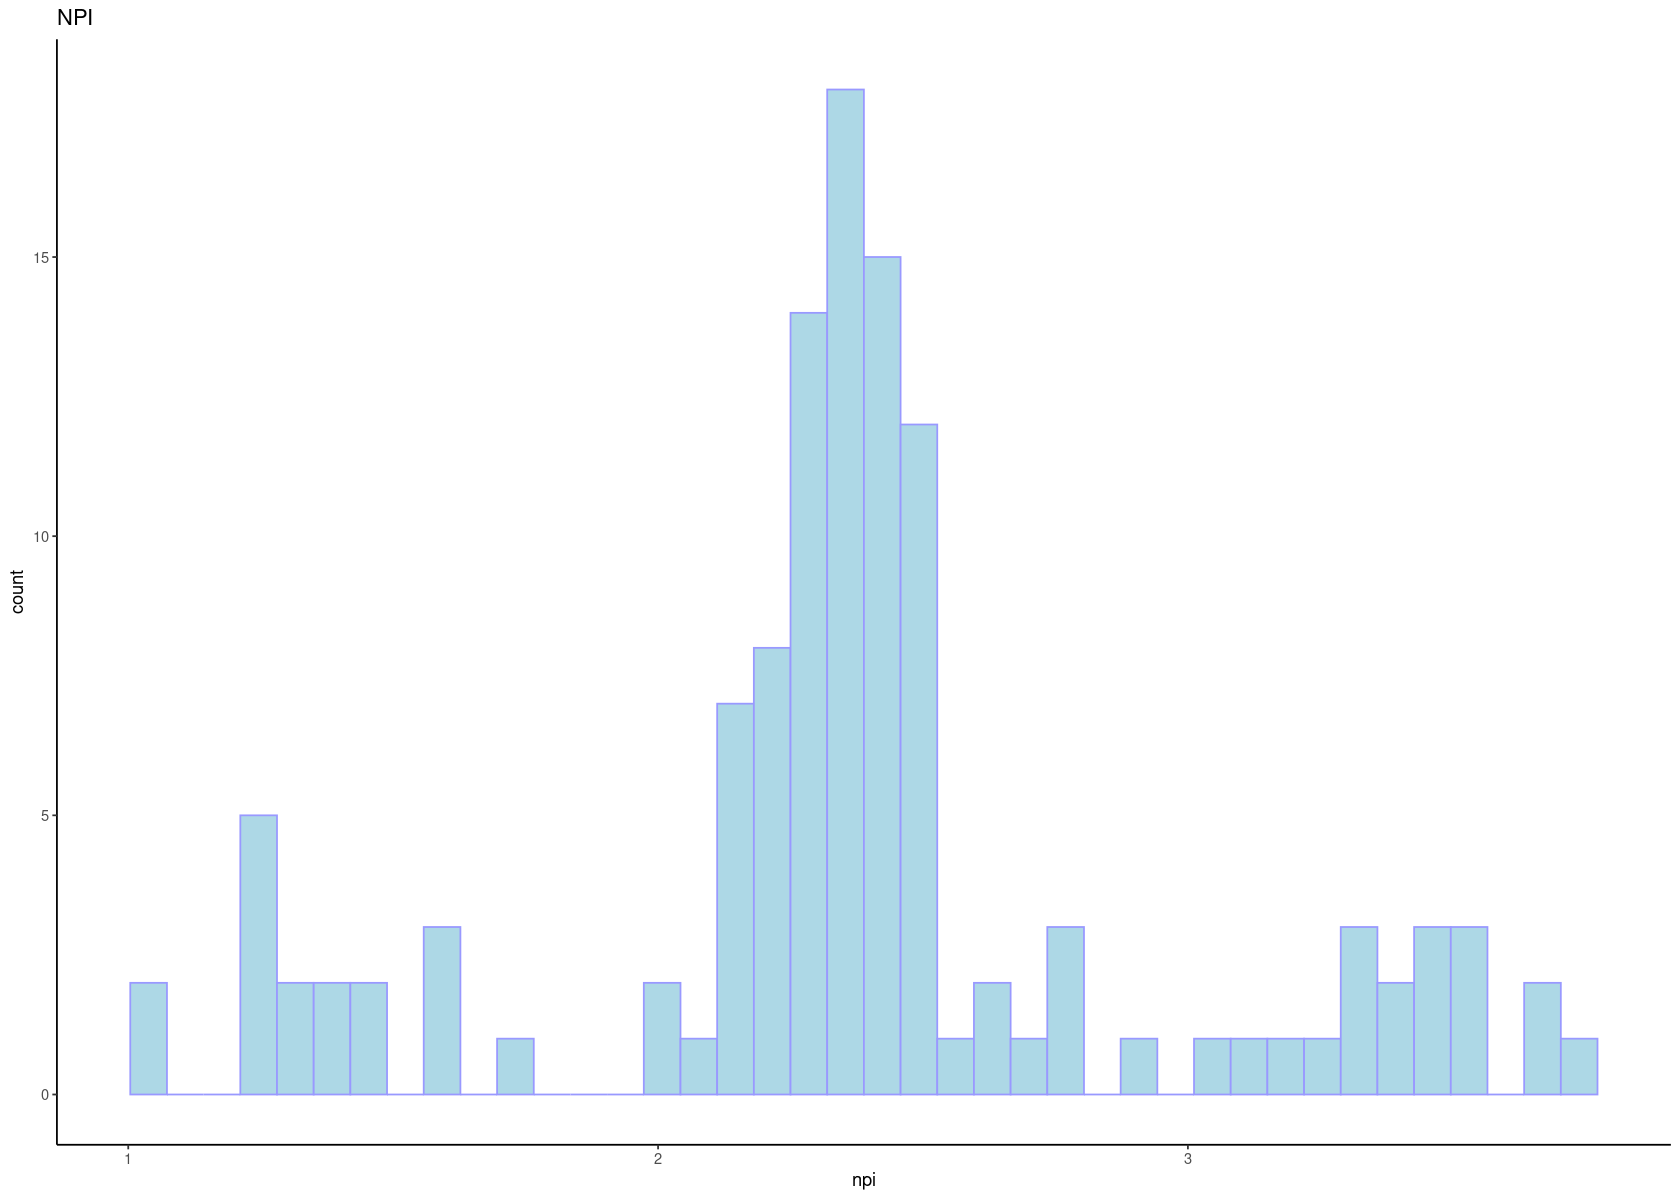

In [57]:
η(dfs_npi[[n]])

## GSE96058

In [59]:
n = 3
df = dfs[[n]]
dim(df)
names(df)[1:100]

[1]  1102 30976

[1] "Row.names"               "GSM_ID"                 
  [3] "TITLE_ID"                "ER"                     
  [5] "PR"                      "HER2"                   
  [7] "KI67"                    "survival_time"          
  [9] "event"                   "hormonal"               
 [11] "chemo"                   "PAM50_SUBTYPE"          
 [13] "age"                     "tumor_size"             
 [15] "node_status"             "grade"                  
 [17] "title"                   "geo_accession"          
 [19] "status"                  "submission_date"        
 [21] "last_update_date"        "type"                   
 [23] "channel_count"           "source_name_ch1"        
 [25] "organism_ch1"            "characteristics_ch1"    
 [27] "characteristics_ch1.1"   "characteristics_ch1.2"  
 [29] "characteristics_ch1.3"   "characteristics_ch1.4"  
 [31] "characteristics_ch1.5"   "characteristics_ch1.6"  
 [33] "characteristics_ch1.7"   "characteristics_ch1.8"  
 [35] "characteristics_ch1.9"   "characteristics_ch1.10" 
 [37] "characteristics_ch1.11"  "characteristics_ch1.12" 
 [39] "characteristics_ch1.13"  "characteristics_ch1.14" 
 [41] "characteristics_ch1.15"  "characteristics_ch1.16" 
 [43] "characteristics_ch1.17"  "characteristics_ch1.18" 
 [45] "characteristics_ch1.19"  "characteristics_ch1.20" 
 [47] "characteristics_ch1.21"  "characteristics_ch1.22" 
 [49] "characteristics_ch1.23"  "characteristics_ch1.24" 
 [51] "molecule_ch1"            "extract_protocol_ch1"   
 [53] "extract_protocol_ch1.1"  "taxid_ch1"              
 [55] "description"             "description.1"          
 [57] "description.2"           "description.3"          
 [59] "data_processing"         "data_processing.1"      
 [61] "data_processing.2"       "data_processing.3"      
 [63] "data_processing.4"       "data_processing.5"      
 [65] "data_processing.6"       "data_processing.7"      
 [67] "data_processing.8"       "data_processing.9"      
 [69] "platform_id"             "contact_name"           
 [71] "contact_email"           "contact_laboratory"     
 [73] "contact_department"      "contact_institute"      
 [75] "contact_address"         "contact_city"           
 [77] "contact_zip/postal_code" "contact_country"        
 [79] "data_row_count"          "instrument_model"       
 [81] "library_selection"       "library_source"         
 [83] "library_strategy"        "relation"               
 [85] "supplementary_file_1"    "age at diagnosis:ch1"   
 [87] "chemo treated:ch1"       "endocrine treated:ch1"  
 [89] "er prediction mgc:ch1"   "er prediction sgc:ch1"  
 [91] "er status:ch1"           "her2 prediction mgc:ch1"
 [93] "her2 prediction sgc:ch1" "her2 status:ch1"        
 [95] "instrument model:ch1"    "ki67 prediction mgc:ch1"
 [97] "ki67 prediction sgc:ch1" "ki67 status:ch1"        
 [99] "lymph node group:ch1"    "lymph node status:ch1"

In [107]:
df[1:5,20:30]

,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,characteristics_ch1.1,characteristics_ch1.2,characteristics_ch1.3,characteristics_ch1.4
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,scan-b external id: Q007313.C007299.S001420.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,age at diagnosis: 66,tumor size: 25,lymph node group: NodeNegative
2,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,scan-b external id: Q004608.C004667.S004514.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,age at diagnosis: 63,tumor size: 13,lymph node group: 1to3
3,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,scan-b external id: Q004655.C004722.S004456.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,age at diagnosis: 51,tumor size: 16,lymph node group: NodeNegative
4,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,scan-b external id: Q004489.C004541.S004642.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,age at diagnosis: 43,tumor size: 5,lymph node group: NodeNegative
5,Mar 09 2017,Mar 12 2018,SRA,1,Primary breast tumor,Homo sapiens,scan-b external id: Q004308.C004342.S004850.l.r.m.c.lib.g.k.a.t,instrument model: HiSeq 2000,age at diagnosis: 70,tumor size: 26,lymph node group: NodeNegative


In [100]:
df$npi = calc_npi(s = df$tumor_size, n = df$node_status, g = df$grade)

In [101]:
dfs_npi[[n]] = init_df(t = df$survival_time, e = df$event, npi = df$npi)

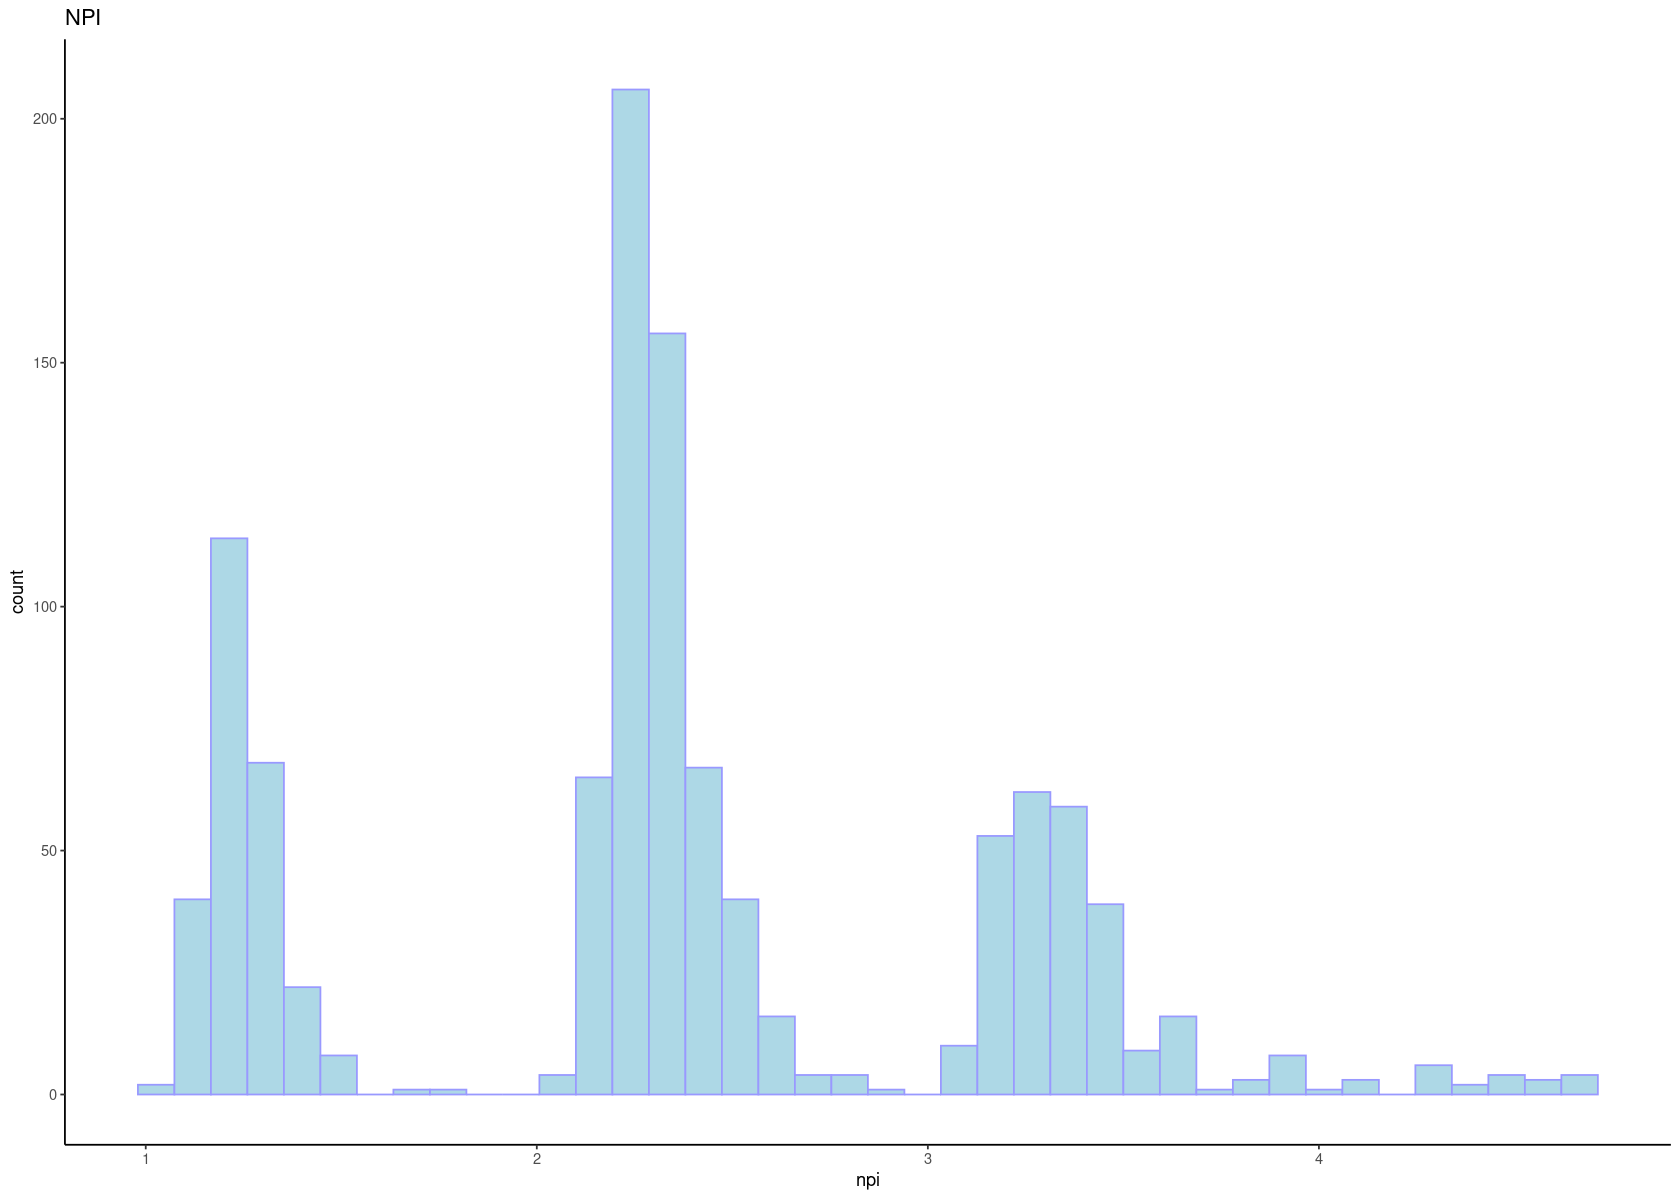

In [102]:
η(dfs_npi[[n]])

## GSE7390

In [116]:
n = 4
df = dfs[[n]]
dim(df)
names(df)[1:100]

[1]   134 12502

[1] "node_status"             "grade"                  
  [3] "tumor_size"              "survival_time"          
  [5] "event"                   "age"                    
  [7] "chemo"                   "hormonal"               
  [9] "ER"                      "Row.names"              
 [11] "title"                   "geo_accession"          
 [13] "status"                  "submission_date"        
 [15] "last_update_date"        "type"                   
 [17] "channel_count"           "source_name_ch1"        
 [19] "organism_ch1"            "characteristics_ch1"    
 [21] "characteristics_ch1.1"   "characteristics_ch1.2"  
 [23] "characteristics_ch1.3"   "characteristics_ch1.4"  
 [25] "characteristics_ch1.5"   "characteristics_ch1.6"  
 [27] "characteristics_ch1.7"   "characteristics_ch1.8"  
 [29] "characteristics_ch1.9"   "characteristics_ch1.10" 
 [31] "characteristics_ch1.11"  "characteristics_ch1.12" 
 [33] "characteristics_ch1.13"  "characteristics_ch1.14" 
 [35] "characteristics_ch1.15"  "characteristics_ch1.16" 
 [37] "characteristics_ch1.17"  "characteristics_ch1.18" 
 [39] "characteristics_ch1.19"  "characteristics_ch1.20" 
 [41] "characteristics_ch1.21"  "characteristics_ch1.22" 
 [43] "characteristics_ch1.23"  "characteristics_ch1.24" 
 [45] "characteristics_ch1.25"  "characteristics_ch1.26" 
 [47] "molecule_ch1"            "extract_protocol_ch1"   
 [49] "label_ch1"               "label_protocol_ch1"     
 [51] "taxid_ch1"               "hyb_protocol"           
 [53] "scan_protocol"           "description"            
 [55] "data_processing"         "platform_id"            
 [57] "contact_name"            "contact_email"          
 [59] "contact_phone"           "contact_laboratory"     
 [61] "contact_department"      "contact_institute"      
 [63] "contact_address"         "contact_city"           
 [65] "contact_state"           "contact_zip/postal_code"
 [67] "contact_country"         "supplementary_file"     
 [69] "data_row_count"          "relation"               
 [71] "relation.1"              "age:ch1"                
 [73] "Angioinv:ch1"            "AOL_os_10y:ch1"         
 [75] "e.dmfs:ch1"              "e.os:ch1"               
 [77] "e.rfs:ch1"               "e.tdm:ch1"              
 [79] "er:ch1"                  "filename:ch1"           
 [81] "grade:ch1"               "Histtype:ch1"           
 [83] "hospital:ch1"            "id:ch1"                 
 [85] "Lymp_infil:ch1"          "node:ch1"               
 [87] "NPI:ch1"                 "risk_AOL:ch1"           
 [89] "risknpi:ch1"             "risksg:ch1"             
 [91] "samplename:ch1"          "size:ch1"               
 [93] "Surgery_type:ch1"        "t.dmfs:ch1"             
 [95] "t.os:ch1"                "t.rfs:ch1"              
 [97] "t.tdm:ch1"               "veridex_risk:ch1"       
 [99] "study_id"                "A1CF"

In [117]:
df$npi = calc_npi(s = df$tumor_size, n = df$node_status, g = df$grade)

In [118]:
dfs_npi[[n]] = init_df(t = df$survival_time, e = df$event, npi = df$npi)

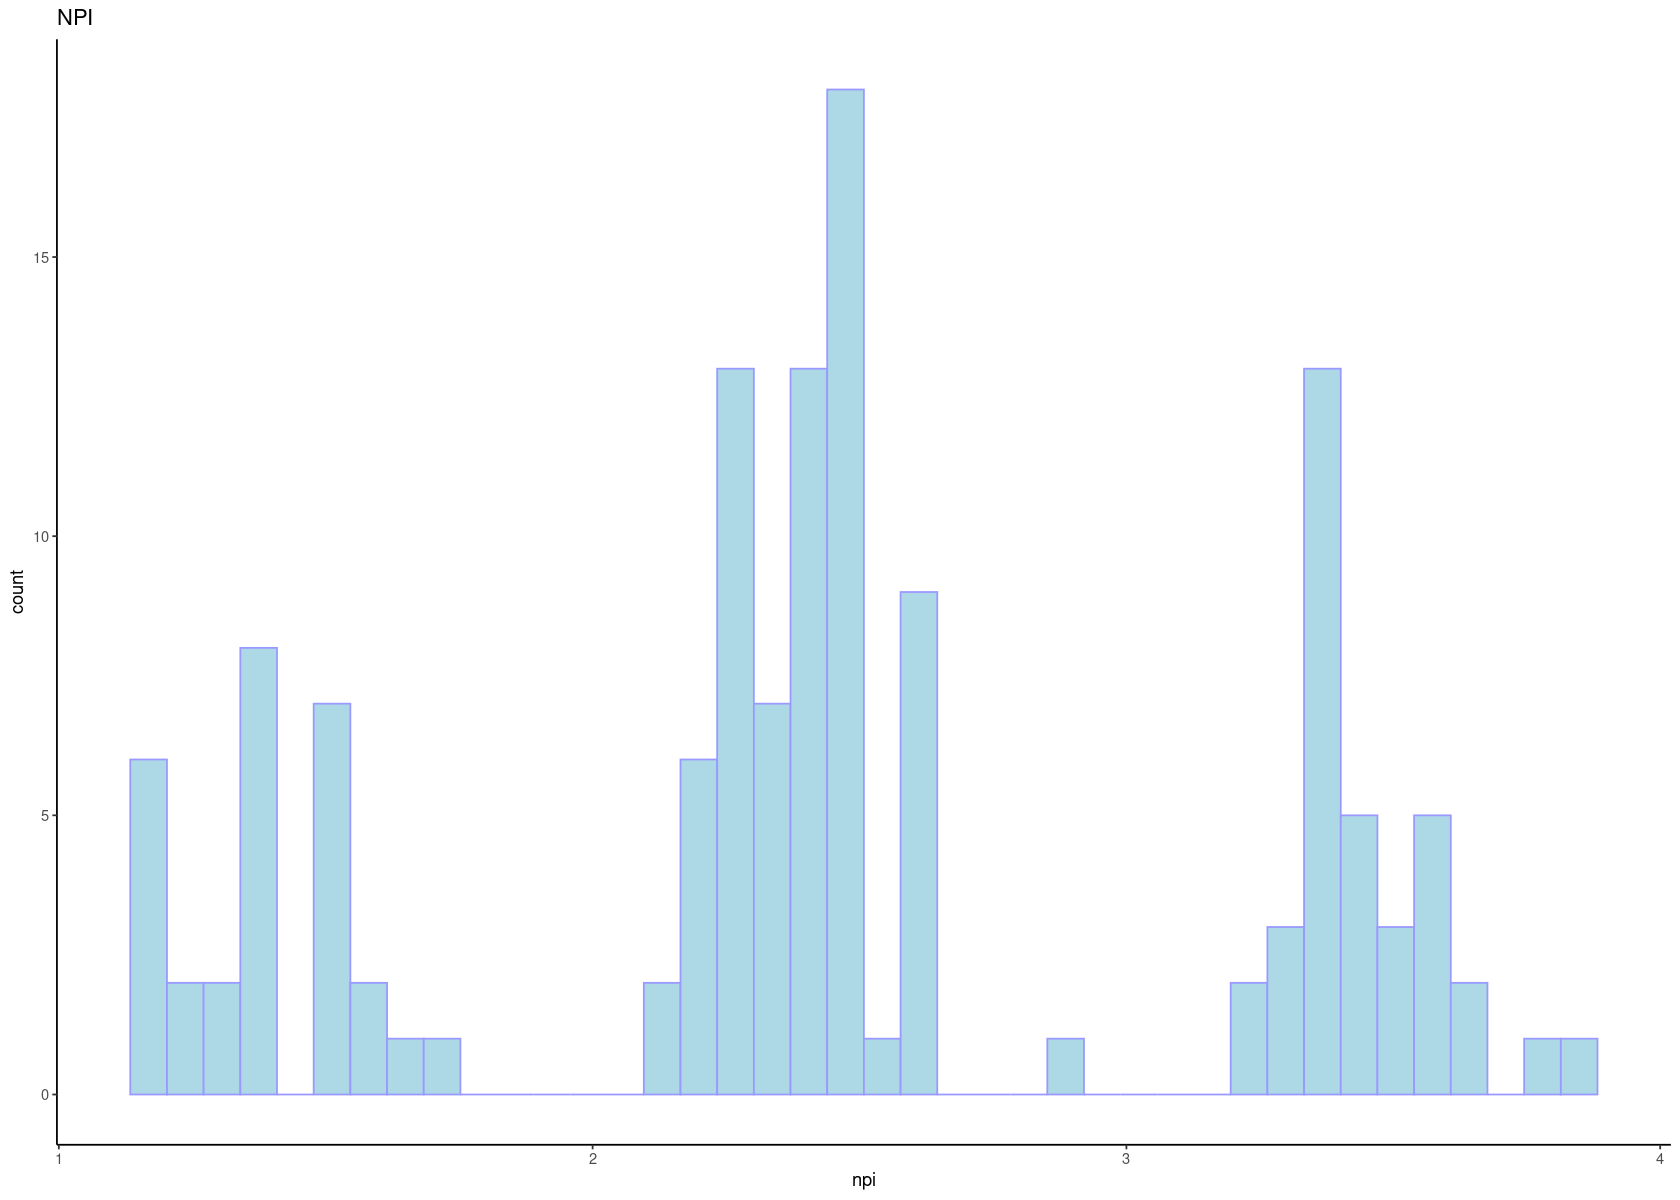

In [119]:
η(dfs_npi[[n]])

## GSE9893

In [120]:
n = 5
df = dfs[[n]]
dim(df)
names(df)[1:100]

[1]   86 7467

[1] "node_status"                               
  [2] "grade"                                     
  [3] "tumor_size"                                
  [4] "survival_time"                             
  [5] "event"                                     
  [6] "age"                                       
  [7] "chemo"                                     
  [8] "hormonal"                                  
  [9] "radiation"                                 
 [10] "ER"                                        
 [11] "PR"                                        
 [12] "Row.names"                                 
 [13] "title"                                     
 [14] "geo_accession"                             
 [15] "status"                                    
 [16] "submission_date"                           
 [17] "last_update_date"                          
 [18] "type"                                      
 [19] "channel_count"                             
 [20] "source_name_ch1"                           
 [21] "organism_ch1"                              
 [22] "characteristics_ch1"                       
 [23] "characteristics_ch1.1"                     
 [24] "characteristics_ch1.2"                     
 [25] "characteristics_ch1.3"                     
 [26] "characteristics_ch1.4"                     
 [27] "characteristics_ch1.5"                     
 [28] "characteristics_ch1.6"                     
 [29] "characteristics_ch1.7"                     
 [30] "characteristics_ch1.8"                     
 [31] "characteristics_ch1.9"                     
 [32] "characteristics_ch1.10"                    
 [33] "characteristics_ch1.11"                    
 [34] "characteristics_ch1.12"                    
 [35] "characteristics_ch1.13"                    
 [36] "characteristics_ch1.14"                    
 [37] "characteristics_ch1.15"                    
 [38] "characteristics_ch1.16"                    
 [39] "characteristics_ch1.17"                    
 [40] "characteristics_ch1.18"                    
 [41] "characteristics_ch1.19"                    
 [42] "characteristics_ch1.20"                    
 [43] "molecule_ch1"                              
 [44] "extract_protocol_ch1"                      
 [45] "label_ch1"                                 
 [46] "label_protocol_ch1"                        
 [47] "taxid_ch1"                                 
 [48] "hyb_protocol"                              
 [49] "scan_protocol"                             
 [50] "description"                               
 [51] "data_processing"                           
 [52] "platform_id"                               
 [53] "contact_name"                              
 [54] "contact_email"                             
 [55] "contact_department"                        
 [56] "contact_institute"                         
 [57] "contact_address"                           
 [58] "contact_city"                              
 [59] "contact_zip/postal_code"                   
 [60] "contact_country"                           
 [61] "supplementary_file"                        
 [62] "data_row_count"                            
 [63] "adjuvant therapy:ch1"                      
 [64] "age:ch1"                                   
 [65] "death cause:ch1"                           
 [66] "decease delay after surgery (months):ch1"  
 [67] "decease delay upon recurrence (months):ch1"
 [68] "distant metastases:ch1"                    
 [69] "follow-up period (months):ch1"             
 [70] "histological type:ch1"                     
 [71] "local recurrence:ch1"                      
 [72] "lymph node checked:ch1"                    
 [73] "n dich+:ch1"                               
 [74] "n+:ch1"                                    
 [75] "pn (tnm):ch1"                              
 [76] "pr:ch1"                                    
 [77] "pt (tnm):ch1"                              
 [78] "sbr grade:ch1"                             
 [79] "state of health:c

In [151]:
df$npi = calc_npi(s = df$tumor_size, n = tonode(df$`n+:ch1`), g = df$grade)

In [152]:
dfs_npi[[n]] = init_df(t = df$survival_time, e = df$event, npi = df$npi)

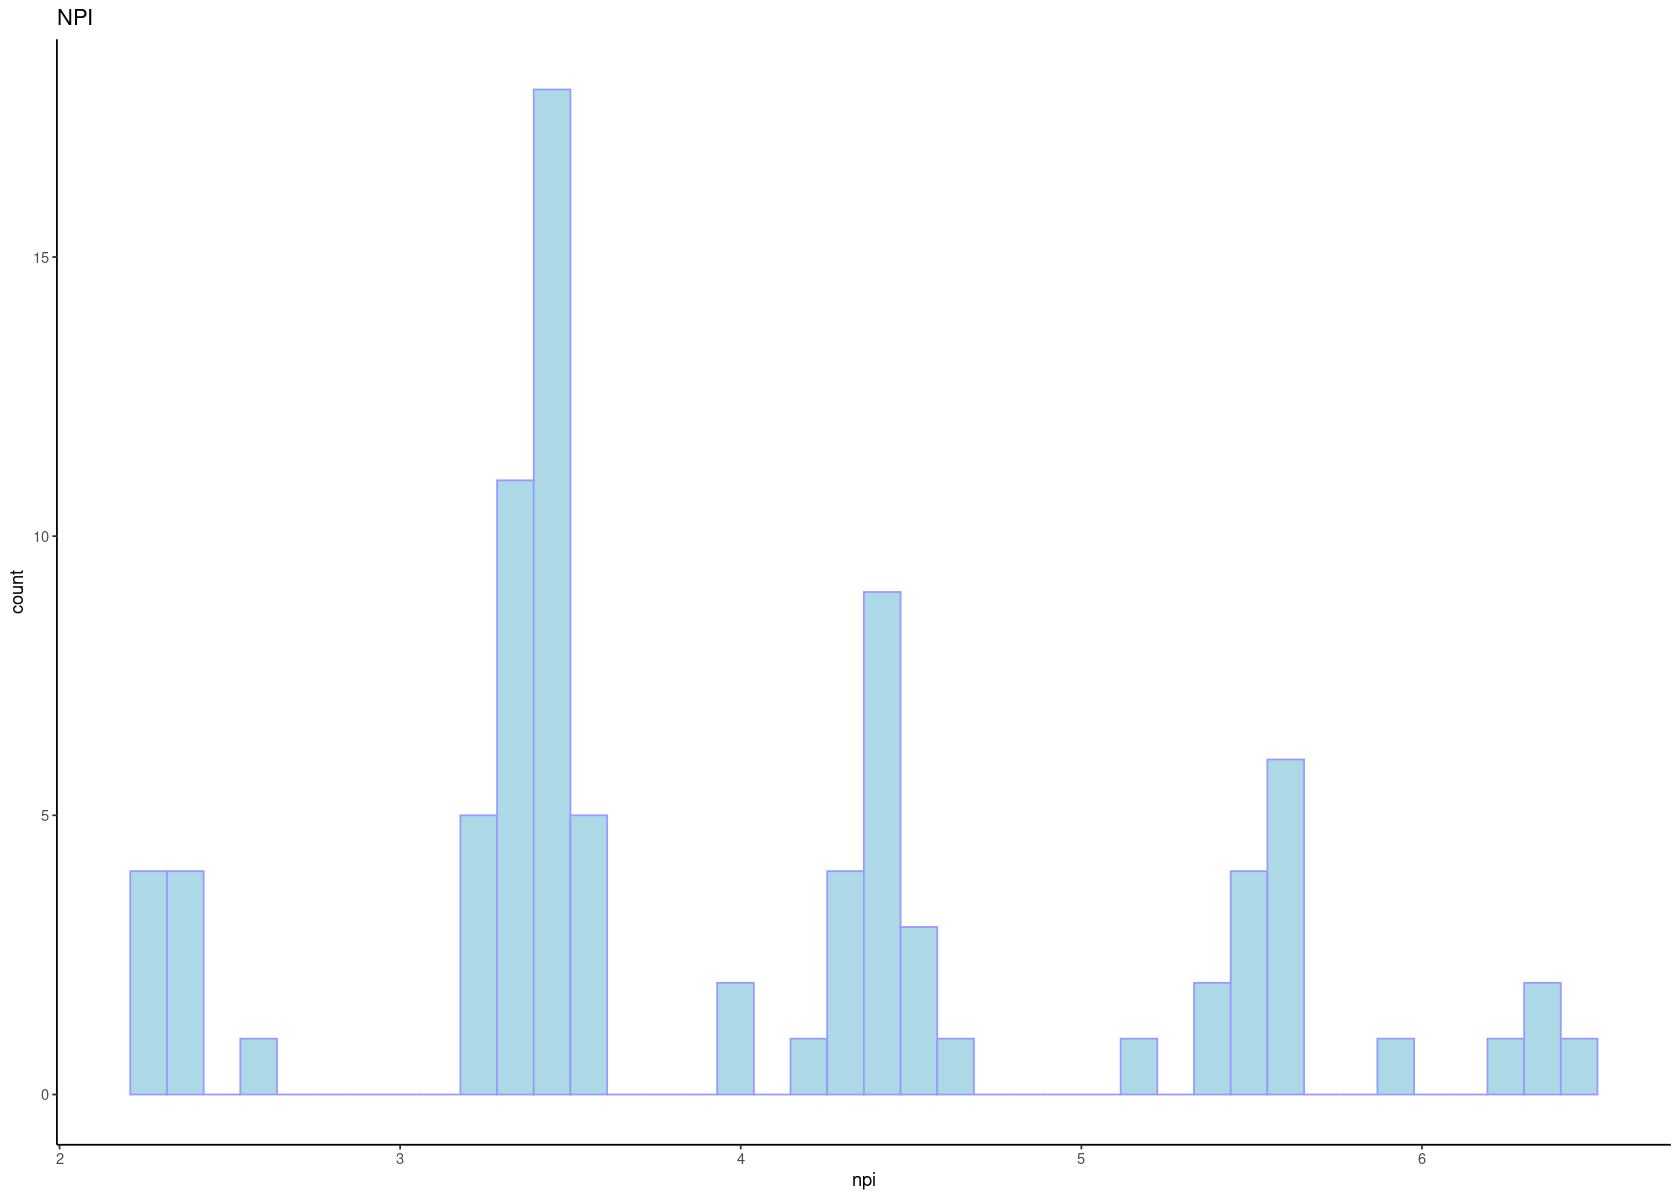

In [153]:
η(dfs_npi[[n]])

## NKI

In [154]:
n = 6
df = dfs[[n]]
dim(df)
names(df)[1:100]

[1]   179 24511

[1] "node_status"   "grade"         "tumor_size"    "survival_time"
  [5] "event"         "age"           "chemo"         "hormonal"     
  [9] "radiation"     "ER"            "Row.names"     "samplename"   
 [13] "dataset"       "series"        "id"            "size"         
 [17] "age.1"         "er"            "grade.1"       "brca.mutation"
 [21] "e.dmfs"        "t.dmfs"        "node"          "t.rfs"        
 [25] "e.rfs"         "treatment"     "tissue"        "t.os"         
 [29] "e.os"          "study_id"      "GREM2"         "SUHW2"        
 [33] "39"            "FGB"           "SCARA5"        "NA1"          
 [37] "RAC1"          "NA2"           "NA3"           "NA4"          
 [41] "NA5"           "NA6"           "GPM6A"         "EIF4H"        
 [45] "C11orf38"      "NA7"           "NA8"           "NA9"          
 [49] "NA10"          "STAC2"         "JMJD1A"        "NA11"         
 [53] "ZNF148"        "NA12"          "NA13"          "NA14"         
 [57] "SLC15A2"       "NA15"          "SAMD9L"        "NA16"         
 [61] "AIFM2"         "RNF130"        "SPRY3"         "KCMF1"        
 [65] "NA17"          "MRFAP1L1"      "NA18"          "NA19"         
 [69] "NA20"          "NA21"          "NA22"          "THSD4"        
 [73] "FAM122B"       "ACBD4"         "NA23"          "NA24"         
 [77] "NA25"          "CLCN2"         "NA26"          "CRTC2"        
 [81] "NA27"          "NA28"          "NA29"          "TTYH1"        
 [85] "NA30"          "NA31"          "CKAP2L"        "NA32"         
 [89] "NA33"          "NA34"          "MS4A1"         "NA35"         
 [93] "NA36"          "NA37"          "NA38"          "NA39"         
 [97] "NA40"          "NA41"          "NA42"          "CST9L"

In [157]:
df$npi = calc_npi(s = df$tumor_size, n = df$node, g = df$grade)

In [158]:
dfs_npi[[n]] = init_df(t = df$survival_time, e = df$event, npi = df$npi)

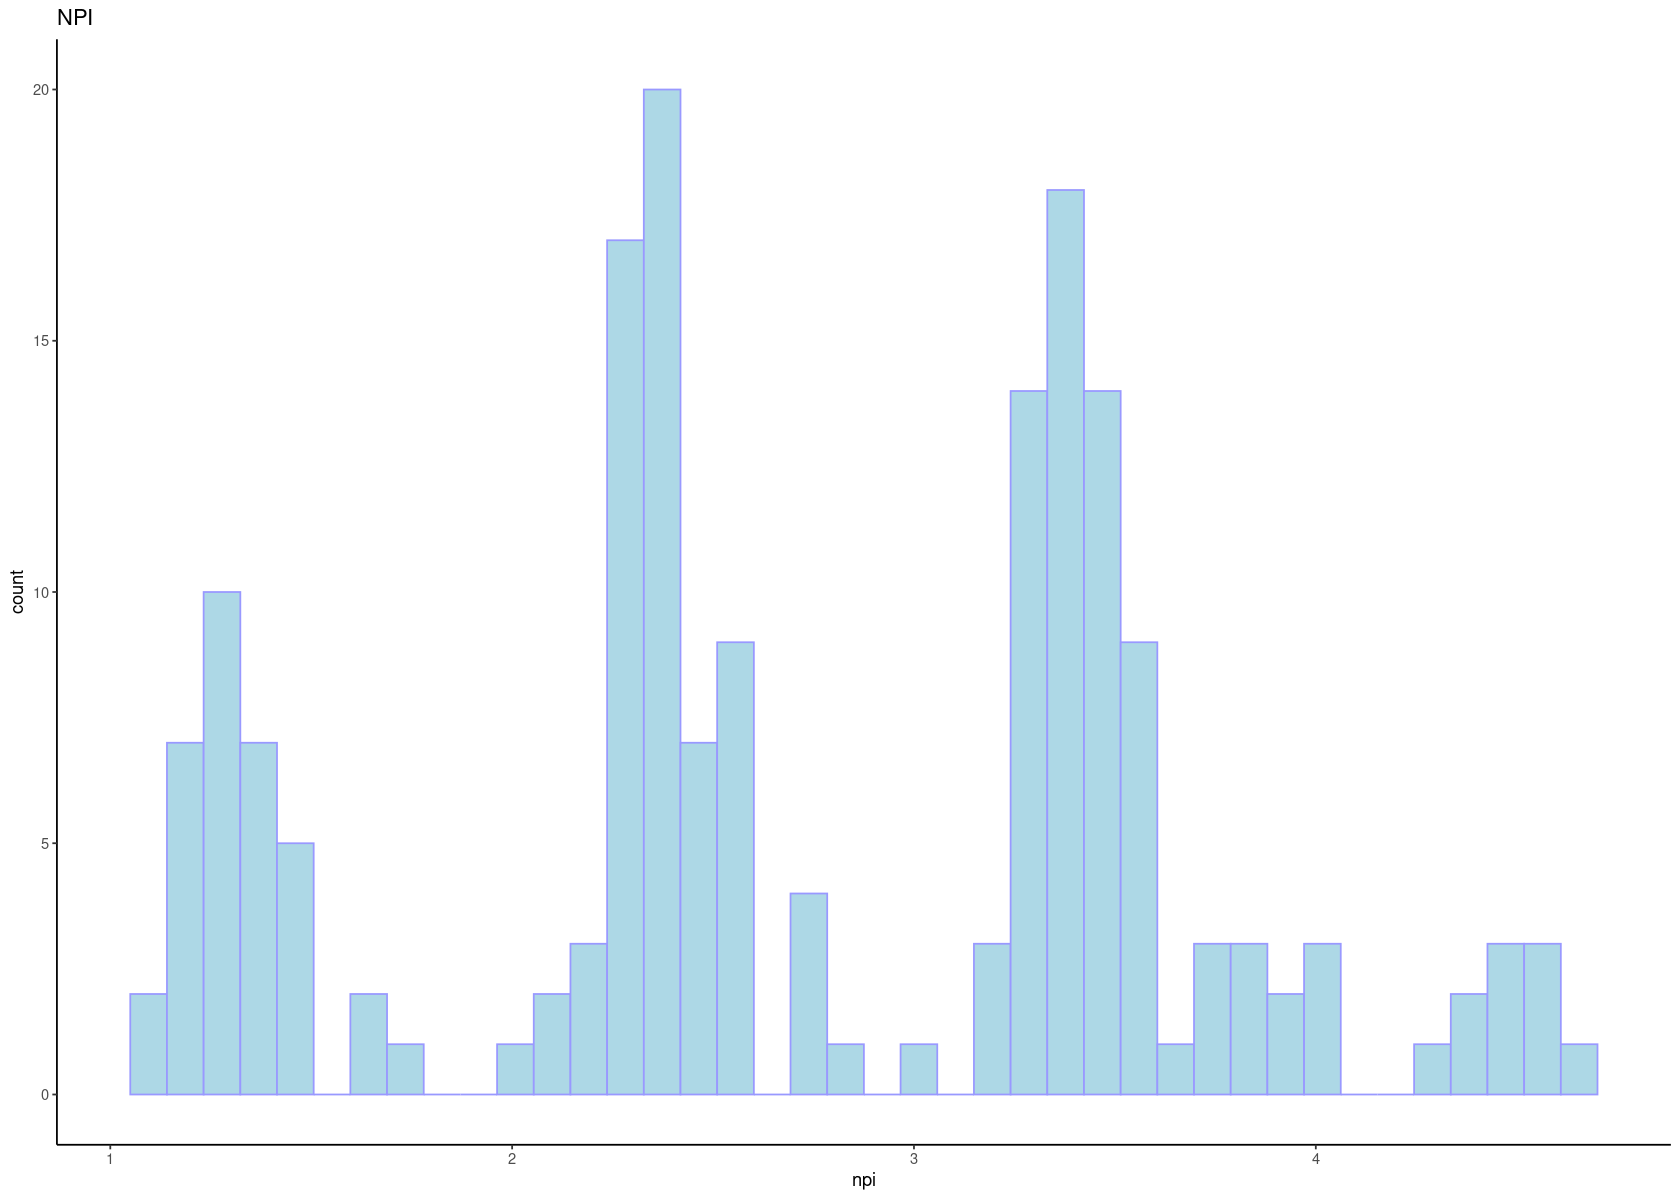

In [159]:
η(dfs_npi[[n]])

## TCGA

In [301]:
n = 7
df = dfs[[n]]
dim(df)
names(df)[1:100]

[1]   169 38245

[1] "node_status"                              
  [2] "survival_time"                            
  [3] "event"                                    
  [4] "age"                                      
  [5] "chemo"                                    
  [6] "hormonal"                                 
  [7] "radiation"                                
  [8] "stage"                                    
  [9] "ER"                                       
 [10] "PR"                                       
 [11] "HER2"                                     
 [12] "therapy"                                  
 [13] "radiation_therapy"                        
 [14] "estrogen_receptor_status"                 
 [15] "progesterone_receptor_status"             
 [16] "er_level_cell_percentage_category"        
 [17] "pr_level_cell_percent_category"           
 [18] "her2_level_cell_percent_category"         
 [19] "group"                                    
 [20] "lib.size"                                 
 [21] "norm.factors"                             
 [22] "barcode"                                  
 [23] "patient"                                  
 [24] "sample"                                   
 [25] "shortLetterCode"                          
 [26] "definition"                               
 [27] "sample_submitter_id"                      
 [28] "sample_type_id"                           
 [29] "oct_embedded"                             
 [30] "sample_id"                                
 [31] "submitter_id"                             
 [32] "state"                                    
 [33] "is_ffpe"                                  
 [34] "sample_type"                              
 [35] "tissue_type"                              
 [36] "days_to_collection"                       
 [37] "initial_weight"                           
 [38] "pathology_report_uuid"                    
 [39] "synchronous_malignancy"                   
 [40] "ajcc_pathologic_stage"                    
 [41] "tumor_stage"                              
 [42] "days_to_diagnosis"                        
 [43] "treatments"                               
 [44] "last_known_disease_status"                
 [45] "tissue_or_organ_of_origin"                
 [46] "days_to_last_follow_up"                   
 [47] "primary_diagnosis"                        
 [48] "age_at_diagnosis"                         
 [49] "prior_malignancy"                         
 [50] "year_of_diagnosis"                        
 [51] "prior_treatment"                          
 [52] "ajcc_staging_system_edition"              
 [53] "ajcc_pathologic_t"                        
 [54] "morphology"                               
 [55] "ajcc_pathologic_n"                        
 [56] "ajcc_pathologic_m"                        
 [57] "classification_of_tumor"                  
 [58] "diagnosis_id"                             
 [59] "icd_10_code"                              
 [60] "site_of_resection_or_biopsy"              
 [61] "tumor_grade"                              
 [62] "progression_or_recurrence"                
 [63] "alcohol_history"                          
 [64] "exposure_id"                              
 [65] "race"                                     
 [66] "ethnicity"                                
 [67] "gender"                                   
 [68] "vital_status"                             
 [69] "age_at_index"                             
 [70] "days_to_birth"                            
 [71] "year_of_birth"                            
 [72] "demographic_id"                           
 [73] "year_of_death"                            
 [74] "days_to_death"                            
 [75] "bcr_patient_barcode"                      
 [76] "primary_site"                             
 [77] "project_id"                               
 [78] "disease_type"                             
 [79] "name"                                     
 [80] "releasable"                               
 [

In [303]:
dfs_npi[[n]] = init_df(t = df$survival_time, e = df$event, npi = rep(NA,length(df$survival_time)))

## GSE4922

In [304]:
n = 8
df = dfs[[n]]
dim(df)
names(df)[1:100]

[1]    80 12477

[1] "node_status"                                                                                                                  
  [2] "grade"                                                                                                                        
  [3] "tumor_size"                                                                                                                   
  [4] "survival_time"                                                                                                                
  [5] "event"                                                                                                                        
  [6] "age"                                                                                                                          
  [7] "hormonal"                                                                                                                     
  [8] "ER"                                                                                                                           
  [9] "Row.names"                                                                                                                    
 [10] "title"                                                                                                                        
 [11] "geo_accession"                                                                                                                
 [12] "status"                                                                                                                       
 [13] "submission_date"                                                                                                              
 [14] "last_update_date"                                                                                                             
 [15] "type"                                                                                                                         
 [16] "channel_count"                                                                                                                
 [17] "source_name_ch1"                                                                                                              
 [18] "organism_ch1"                                                                                                                 
 [19] "characteristics_ch1"                                                                                                          
 [20] "characteristics_ch1.1"                                                                                                        
 [21] "characteristics_ch1.2"                                                                                                        
 [22] "characteristics_ch1.3"                                                                                                        
 [23] "characteristics_ch1.4"                                                                                                        
 [24] "characteristics_ch1.5"                                                                                                        
 [25] "characteristics_ch1.6"                                                                                                        
 [26] "characteristics_ch1.7"                                                                                                        
 [27] "characteristics_ch1.8"                                                                                                        
 [28] "characteristics_ch1.9"                                                                                                        
 [29] "characteristics_ch1.10"                                                                                                       
 [30] "characteristics_ch1.11"                                                                                      

In [305]:
df[1:5,30:40]

,characteristics_ch1.11,characteristics_ch1.12,characteristics_ch1.13,characteristics_ch1.14,characteristics_ch1.15,molecule_ch1,extract_protocol_ch1,label_ch1,label_protocol_ch1,taxid_ch1,hyb_protocol
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Lymph node status: LN-,p53 seq mut status (p53+=mutant; p53-=wildtype): p53-,age at diagnosis: 68,tumor size (mm): 9,,total RNA,Qiagen RNeasy Mini Kit,biotin,Approximately 10ug of total RNA was processed to produce biotynylated cRNA targets,9606,Standard Affymetrix procedure
2,Lymph node status: LN-,p53 seq mut status (p53+=mutant; p53-=wildtype): p53-,age at diagnosis: 46,tumor size (mm): 13,,total RNA,Qiagen RNeasy Mini Kit,biotin,Approximately 10ug of total RNA was processed to produce biotynylated cRNA targets,9606,Standard Affymetrix procedure
3,Lymph node status: LN-,p53 seq mut status (p53+=mutant; p53-=wildtype): p53-,age at diagnosis: 37,tumor size (mm): 60,,total RNA,Qiagen RNeasy Mini Kit,biotin,Approximately 10ug of total RNA was processed to produce biotynylated cRNA targets,9606,Standard Affymetrix procedure
4,Lymph node status: LN-,p53 seq mut status (p53+=mutant; p53-=wildtype): p53-,age at diagnosis: 70,tumor size (mm): 50,,total RNA,Qiagen RNeasy Mini Kit,biotin,Approximately 10ug of total RNA was processed to produce biotynylated cRNA targets,9606,Standard Affymetrix procedure
5,Lymph node status: LN-,p53 seq mut status (p53+=mutant; p53-=wildtype): p53+,age at diagnosis: 41,tumor size (mm): 33,,total RNA,Qiagen RNeasy Mini Kit,biotin,Approximately 10ug of total RNA was processed to produce biotynylated cRNA targets,9606,Standard Affymetrix procedure


In [306]:
df$npi = calc_npi(s = df$tumor_size, n = df$node_status, g = df$grade)

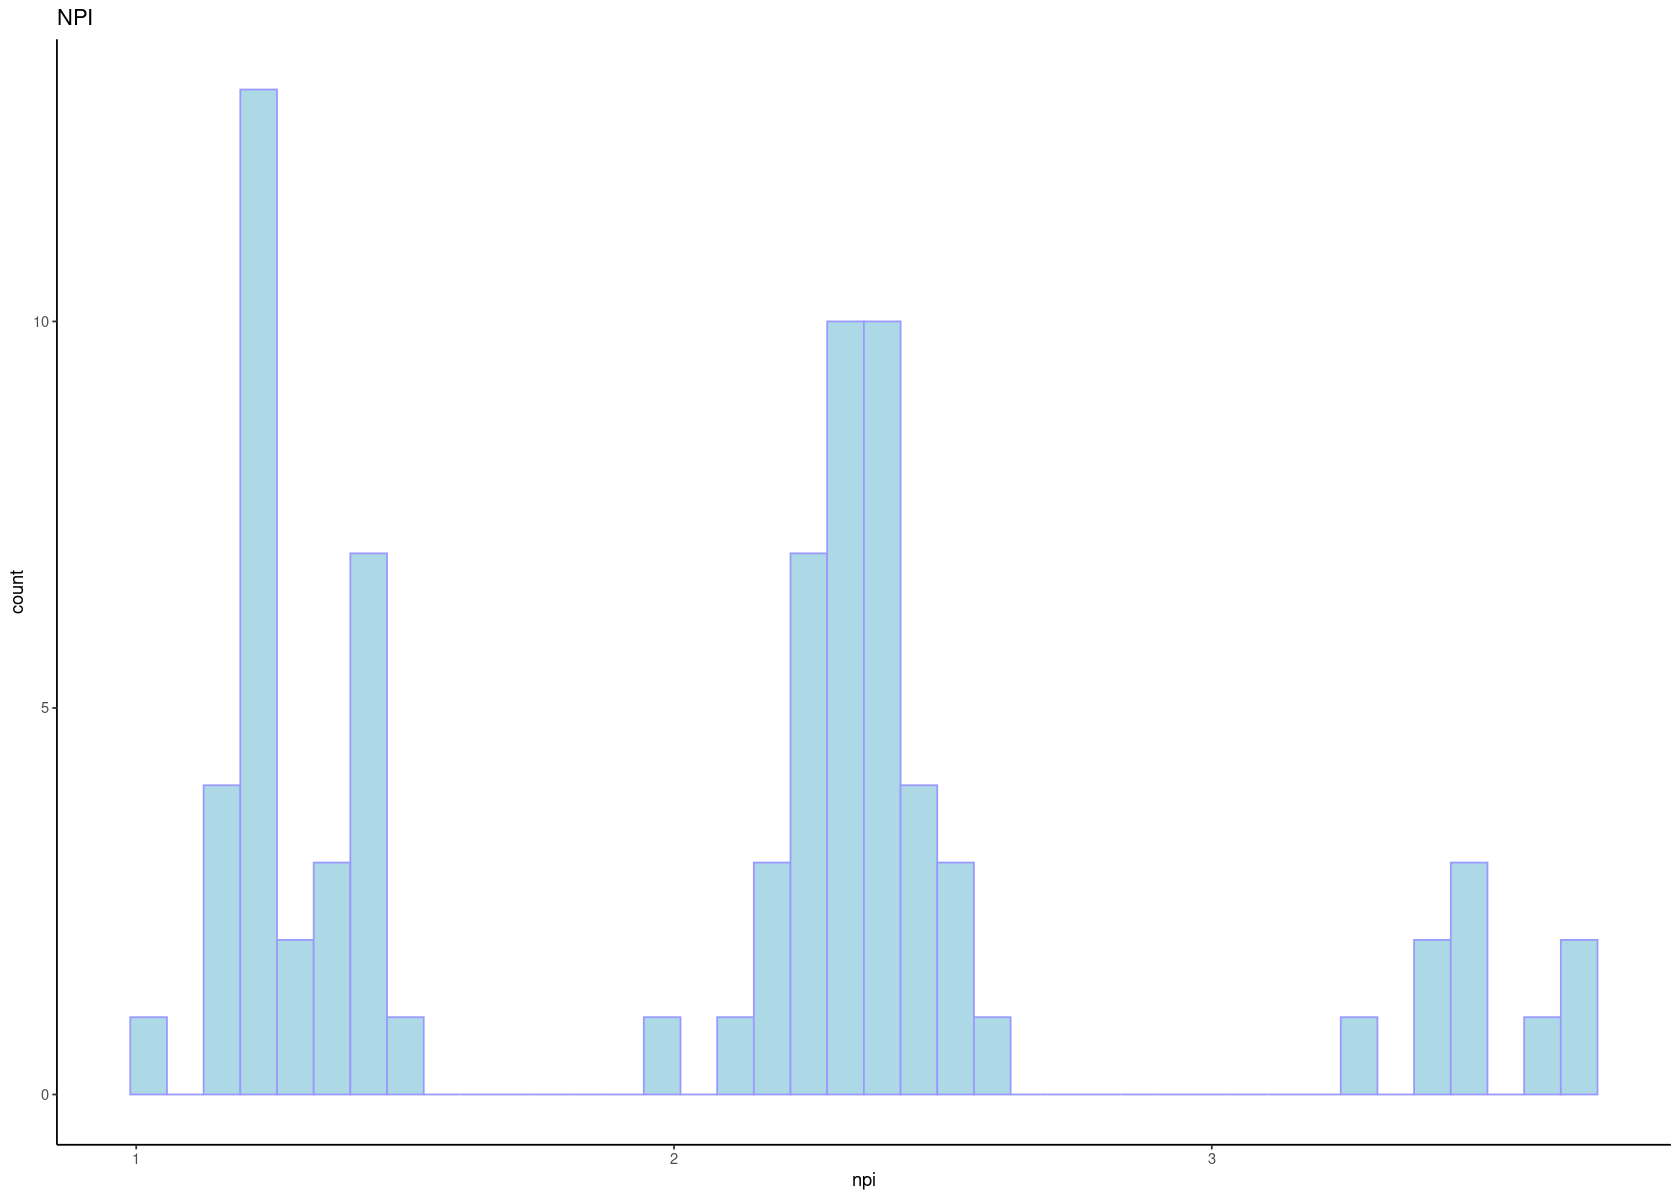

In [307]:
dfs_npi[[n]] = init_df(t = df$survival_time, e = df$event, npi = df$npi)
η(dfs_npi[[n]])

## Save data

In [308]:
saveRDS(dfs_npi, paste(data_path,"dfs_npi.rds"))

## Export code

In [311]:
system("python3 notebook2script.py 03b_npi.ipynb")